In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal, fftpack

In [2]:
x_in = np.random.randn(1024)
coeffs = signal.firwin(10,0.25)
d_in = signal.convolve(x_in, coeffs)
d_in = d_in[9:]

In [3]:
# x is our random input
# d is our designed signal
# start by defining some coefficients.  we always have 10 coefficients, but we want to track over each iteration
h_est = np.zeros([10,1024])
values = np.arange(1000)
e = np.zeros(1024)
y = np.zeros(1024)
for n in values:
    y[n] = (x_in[n:n+10] * h_est[0:10,n-1]).sum()
    e[n] = d_in[n] - y[n]
    for k in range(10):
        h_est[k,n] = h_est[k, n-1] + 0.1*e[n]*x_in[n+k]
    

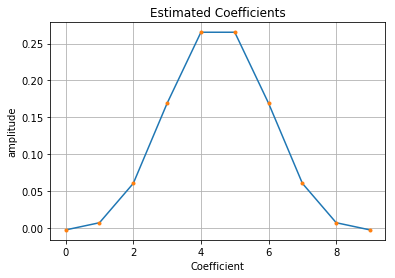

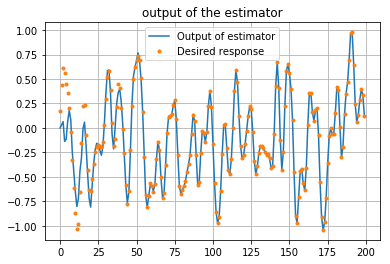

In [4]:
plt.figure()
plt.plot(h_est[:,900], label='converged results')
plt.plot(coeffs,'.', label='Original coefficients')
plt.xlabel('Coefficient')
plt.ylabel('amplitude')
plt.grid(True)
plt.title('Estimated Coefficients')
plt.figure()
plt.plot(y[0:200], label='Output of estimator')
plt.plot(d_in[0:200], '.', label='Desired response')
plt.legend()
plt.title('output of the estimator')
plt.grid(True)



In [5]:
# success!  now make a function of that so we can play with sizes, over, under constrain things
def lms(x_in, d_in, n_coeffs):
    h_est = np.zeros([n_coeffs,1024])
    values = np.arange(1000)
    e = np.zeros(1024)
    y = np.zeros(1024)
    for n in values:
        y[n] = (x_in[n:n+n_coeffs] * h_est[0:n_coeffs,n-1]).sum()
        e[n] = d_in[n] - y[n]
        for k in range(n_coeffs):
            h_est[k,n] = h_est[k, n-1] + 0.1*e[n]*x_in[n+k]
    return y, h_est, e

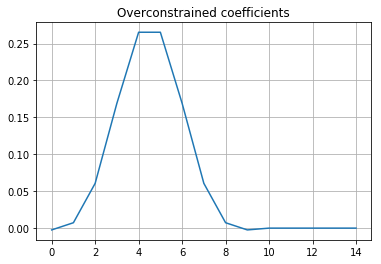

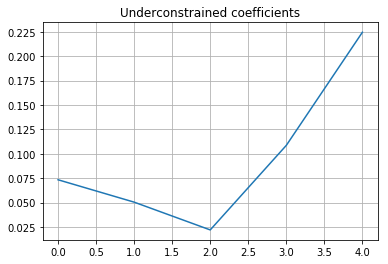

In [6]:
plt.figure()
y, h_est, e = lms(x_in, d_in, 15) # overconstrain
plt.plot(h_est[:,799])
plt.title('Overconstrained coefficients')
plt.grid(True)
y, h_est, e = lms(x_in, d_in, 5) # underconstrain
plt.figure()
plt.plot(h_est[:,799])
plt.title('Underconstrained coefficients')
plt.grid(True)


Text(0.5,1,'Estimated Coefficients')

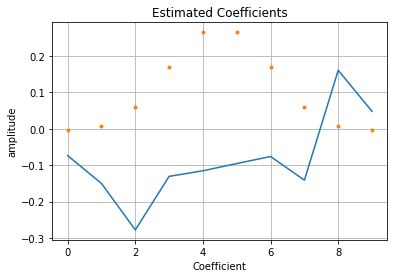

In [10]:
# now my next question is, if I capture a desired response, but use a different input (but with same statistics) does it converge?
x_in2 = np.random.randn(1024)
y, h_est, e = lms(x_in2, d_in, 10)
plt.figure()
plt.plot(h_est[:,900], label='converged results')
plt.plot(coeffs,'.', label='Original coefficients')
plt.xlabel('Coefficient')
plt.ylabel('amplitude')
plt.grid(True)
plt.title('Estimated Coefficients')

In [11]:
# Nope!